# **Running a Logistic Regression to classify whether a given Credit Card transaction is fraud or not.**

### 1.) Importing the Credit Card Fraud Data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

### 2.) Selecting four columns to use as features

In [ ]:
type(df["trans_date_trans_time"][0]) #picking this variable to creatively transform it into a meaningful time indicator variable

str

In [ ]:
#so convert to datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [ ]:
predictors = df[['trans_date_trans_time', 'category', 'amt', 'city_pop']]
predictors

,trans_date_trans_time,category,amt,city_pop
0,2020-06-21 12:14:25,personal_care,2.86,333497
1,2020-06-21 12:14:33,personal_care,29.84,302
2,2020-06-21 12:14:53,health_fitness,41.28,34496
3,2020-06-21 12:15:15,misc_pos,60.05,54767
4,2020-06-21 12:15:17,travel,3.19,1126
...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,519
555715,2020-12-31 23:59:09,kids_pets,111.84,28739
555716,2020-12-31 23:59:15,kids_pets,86.88,3684
555717,2020-12-31 23:59:24,travel,7.99,129


### 3.) Creating a unique variable out of trans_date and dummies for string variables.

In [46]:
#creating a 'night' variable for all transaction times between midnight and 6 AM where 1= night and 0= day

predictors['time_var'] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour
predictors['time_var'] = [1 if 0<= i <=5 else 0 for i in predictors['time_var']]

<ipython-input-46-25ef1e0ba13b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['time_var'] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour


In [56]:
predictors['time_var'].unique()

array([0, 1])

In [57]:
dummies = pd.get_dummies(predictors["category"])
x = pd.concat([dummies, predictors[["amt", "city_pop","time_var"]]], axis=1)  #final predictor variables
y = df["is_fraud"]   #response variable

### 5.) Training a Logistic Regression.

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg = LogisticRegression().fit(x_scaled, y)

### 6.) Evaluation of False Positive Rate.

In [64]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = log_reg.predict(x_scaled)

# Get the confusion matrix
cm = confusion_matrix(y, y_pred)

# Calculate the false positive rate
fpr = cm[0,1] / (cm[0,0] + cm[0,1])

# Print the false positive rate
print("False Positive Rate:", fpr)


False Positive Rate: 0.0002854180290259297


The False Positive Rate is already very low which is great in this context - we do not want to flag or block cards of non-fraudulent customers very often. That could cause higher customer churn.

However, if the FPR was higher and we wanted to target, say 5% FPR, the following loop could be performed to find the classification threshold that leads to 5% FPR.

In [69]:
from sklearn.metrics import f1_score

# Make predictions
y_probs = log_reg.predict_proba(x_scaled)[:,1]

# Define the desired false positive rate
desired_fpr = 0.05

# Initialize the threshold
threshold = 0

# Initialize the f1_score
best_f1 = -1

for t in np.arange(0,1,0.01):
    y_pred = y_probs > t
    fpr = confusion_matrix(y, y_pred)[0,1] / (confusion_matrix(y, y_pred)[0,0] + confusion_matrix(y, y_pred)[0,1])
    if fpr <= desired_fpr:
        f1 = f1_score(y, y_pred)
        if f1>best_f1:
            best_f1 = f1
            threshold = t

# Make predictions using the optimal threshold
y_pred = (y_probs > threshold).astype(int)

print("Optimal threshold:", threshold)

Optimal threshold: 0.03


In [66]:
import numpy as np

### 7.) Further building on the real-life application of this model and analysing its performance and consequences. Let us assume the Credit Card provider makes .02 on True transactions and loses -1 on False transactions.

In [73]:
cm = confusion_matrix(y, y_pred)
cm

array([[551997,   1577],
       [  1430,    715]])

In [83]:
gains = 0.02*(cm[0,0] + cm[1,1])
loss = -1*(cm[0,1] + cm[1,0])
total = gains + loss
print("Total gain/loss to the company from this logistic model is", total)

Total gain/loss to the company from this logistic model is 8047.24


### 8.) Testing if the selected features can be used in a trusted prediction model using Lasso.

In [88]:
from sklearn.linear_model import LassoCV

In [91]:
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model
logreg_lasso.fit(x_scaled, y)

# Make predictions
y_pred1 = logreg_lasso.predict(x_scaled)

In [107]:
pred_coeffs = logreg_lasso.coef_

In [112]:
pred_coeffs[0]

array([-0.05316698, -0.05771169,  0.06750645,  0.        ,  0.39222235,
       -0.04340219, -0.08349492, -0.06831591,  0.30498847, -0.00704026,
        0.01440355,  0.40732287,  0.10328831, -0.92046133,  0.33373245,
       -0.11676236,  0.1662585 ])

In [103]:
#getting the name of columns for plotting
coeffs = (x.columns)

In [104]:
import matplotlib.pyplot as plt

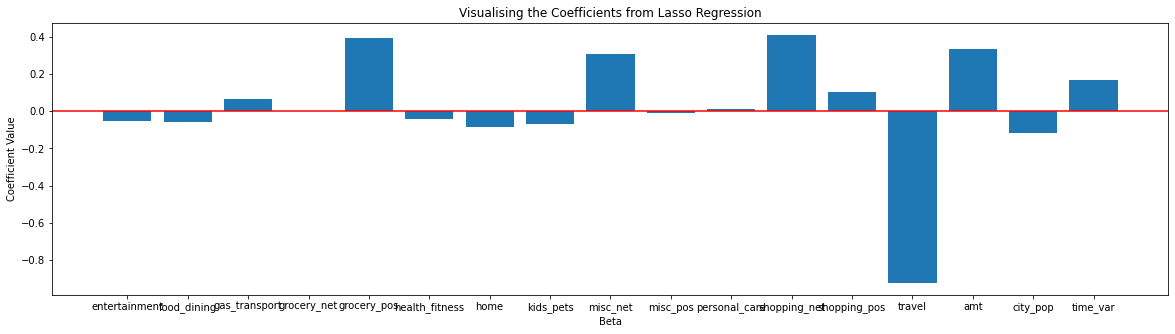

In [116]:
plt.figure(figsize = (20,5))
plt.bar(coeffs, pred_coeffs[0])
plt.axhline(0, color = "red")
plt.title("Visualising the Coefficients from Lasso Regression")
plt.xlabel("Beta")
plt.ylabel("Coefficient Value")
plt.show()

#### Conclusion:
The above graph shows that most of the chosen predictor values are significant in predicting the fraud class of each transaction. Only variables 'grocery_net', 'misc_pos', and 'personal_care' reduce to 0 indicating that they do not contribute to the regression model.

#### Further Work:

The model should be explore further to check if there are highly colinear predictors. In that case, Lasso would not be the best shrinkage method. Lasso can also be improved by running a cross-validated lambda selection. Cross validation and bootstrapping methods can also be used to select more appropriate variables in the beginning of this project. Finally, more of the classification statistics should be analysed as FPR is not a measure of accuracy and good predicting power.